<a href="https://colab.research.google.com/github/bhargav1237874/grandhe_INFO5731_spring2021/blob/main/In_class_exercise_08_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The eighth in-class-exercise (20 points in total, 3/30/2021)**

The data for this exercise is from the dataset you created from assignment three. Please perform answer the following questions based on your data:

## (1) (10 points) Write a python program to extract the sentiment related terms from the corpus. You may use python package such as polyglot or external lexicon resources in the question. Rank the sentiment related terms by frequency.

In [9]:
# Installing libraries

!pip install polyglot
!pip install pyicu
!pip install pycld2
!pip install morfessor




     |████████████████████████████████| 133kB 5.6MB/s 
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52557 sha256=27e0d02517f2c89d139a84dd8fac436751892e417d9a57253554c18e0cd92f24
  Stored in directory: /root/.cache/pip/wheels/5e/91/ef/f1369fdc1203b0a9347d4b24f149b83a305f39ab047986d9da
Successfully built polyglot
     |████████████████████████████████| 235kB 4.4MB/s 
  Created wheel for pyicu: filename=PyICU-2.6-cp37-cp37m-linux_x86_64.whl size=1306401 sha256=b400251dcbaa072727bbd3d1e666d7d1d9fc52b68e5c6febfa957f1643fb1877
  Stored in directory: /root/.cache/pip/wheels/31/21/2f/1c91831e8a93537ab21f6b4b935781b681104635fdb0315791
Successfully built pyicu
     |████████████████████████████████| 41.4MB 98kB/s 
  Created wheel for pycld2: filename=pycld2-0.41-cp37-cp37m-linux_x86_64.whl size=9834366 sha256=3e2218a4571fedef706967c331caf603f2f51a69941ed87109e17a186f644b45
  Stored in directory: /root/.cache/pip/wheels/c6/8f/e9/08a1a8932a490175bd140206cd86a3db

In [10]:

%%bash
polyglot download sentiment2.en

[polyglot_data] Downloading package sentiment2.en to
[polyglot_data]     /root/polyglot_data...


In [11]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
# Reading data

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/bhargav1237874/grandhe_INFO5731_spring2021/main/sentiment_analysis_3.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]



In [13]:
# Preprocessing data

from nltk.corpus import stopwords
from textblob import TextBlob
df['Review'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Review'] = df['Review'].str.replace('[^\w\s]','')
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Review'] = df['Review'].apply(lambda x: str(TextBlob(x).correct()))



In [14]:
# extracting words using polyglot

from polyglot.text import Text
sentimental_words = []
for line in df['Review']:
  text = Text(line)
  for w in text.words:
    if w.polarity != 0:
      sentimental_words.append(w)
sentimental_words

['brilliance',
 'grotesque',
 'hard',
 'mesmerizing',
 'tragic',
 'funny',
 'rollercoaster',
 'proper',
 'best',
 'isolated',
 'sorry',
 'encourage',
 'better',
 'respect',
 'like',
 'isolated',
 'masterpiece',
 'best',
 'best',
 'best',
 'willingly',
 'remarkable',
 'disturbing',
 'violent',
 'proving',
 'corruption',
 'rich',
 'talented',
 'believable',
 'shake',
 'bitter',
 'comforting',
 'perfect',
 'fearless',
 'stunning',
 'impossible',
 'dark',
 'joke',
 'stunned',
 'accomplished',
 'impossible',
 'exceeds',
 'dark',
 'crime',
 'like',
 'falling',
 'joke',
 'happy',
 'ignore',
 'complaints',
 'pernicious',
 'embarrassing',
 'better',
 'criminal',
 'dark',
 'joke',
 'dark',
 'fall',
 'love',
 'bad',
 'romantic',
 'scars',
 'amazing',
 'best',
 'breathtaking',
 'uncomfortable',
 'like',
 'horrible',
 'great',
 'inspiration',
 'honest',
 'violent',
 'disturbing',
 'violent',
 'controversy',
 'great',
 'best',
 'hate',
 'madness',
 'enjoy',
 'masterpiece',
 'amazing',
 'enjoy',
 'jo

In [15]:
# ranking sentiment by frequency
from collections import Counter
frequencies = Counter(sentimental_words)
rank_df = pd.DataFrame(list(frequencies.most_common()), columns=['Words', 'Frequencies'])
rank_df.index = list(range(1, len(frequencies.most_common())+1))
rank_df

,Words,Frequencies
1,joke,135
2,like,61
3,good,53
4,best,40
5,dark,33
...,...,...
467,cry,1
468,marvelous,1
469,tolerable,1
470,pleasantly,1


## (2) (10 points) Compare the performance of the following tools in sentiment identification: TextBlob (https://textblob.readthedocs.io/en/dev/), VADER (https://github.com/cjhutto/vaderSentiment), TFIDF-based Support Vector Machine (SVM) (Split your data into training and testing data). Take your own annotation as the standard answers. 

Reference code: https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-1-2697bb111ed4

In [17]:
def Encoder(senti):
  sentiment_encoded = 0
  if senti == 'Positive':
    sentiment_encoded = 1
  elif senti == 'Negative':
    sentiment_encoded = 2
  return sentiment_encoded

actual_sentiment = []
for senti in df['Sentimental Analysis']:
  actual_sentiment.append(Encoder(senti))  



# Sentiment analysis using textblob

from textblob import TextBlob
textblob_sentiments = []
for line in df['Review']:
  polarity = TextBlob(line).sentiment.polarity
  if polarity > 0:
    textblob_sentiments.append(1)
  elif polarity < 0:
    textblob_sentiments.append(2)
  elif polarity == 0.0:
    textblob_sentiments.append(0)
text_blob_df = pd.DataFrame(list(zip(df['Review'], actual_sentiment, textblob_sentiments)), columns = ['Reviews', 'Actual', 'Predicted'])
text_blob_df


from sklearn.metrics import f1_score, accuracy_score
text_blob_accuracy = accuracy_score(text_blob_df['Actual'], text_blob_df['Predicted'])*100
text_blob_f1_score = f1_score(text_blob_df['Actual'], text_blob_df['Predicted'], average = 'macro')
print("Text Blob Accuracy is {0} and F1 Score is {1}".format(text_blob_accuracy, text_blob_f1_score))






Text Blob Accuracy is 56.481481481481474 and F1 Score is 0.399400871459695


In [18]:
# Analysis using vader

import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
vader_sentiments = []
for line in df['Review']:
  polarity = vader.polarity_scores(line)['compound']
  if polarity > 0:
    vader_sentiments.append(1)
  elif polarity < 0:
    vader_sentiments.append(2)
  elif polarity == 0.0:
    vader_sentiments.append(0)
vader_df = pd.DataFrame(list(zip(df['Review'], actual_sentiment, vader_sentiments)), columns = ['Reviews', 'Actual', 'Predicted'])
vader_df

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,Reviews,Actual,Predicted
0,every movie comes truly makes impact joaquins ...,1,1
1,movie felt alone isolated truly relate underst...,1,1
2,truly masterpiece best hollywood film 2019 one...,1,1
3,joaquin phoenix gives tour de force performanc...,0,1
4,time moves anticipated like end falling short ...,2,1
...,...,...,...
103,truly masterpiece best hollywood film 2019 one...,1,1
104,acting cinematography sound design script phen...,1,1
105,plan watching would suggest shipping last 20 3...,2,1
106,want title make wouldn know based comicbook ch...,1,2


In [19]:
from sklearn.metrics import f1_score, accuracy_score
vader_accuracy = accuracy_score(vader_df['Actual'], vader_df['Predicted'])*100
vader_f1_score = f1_score(vader_df['Actual'], vader_df['Predicted'], average = 'macro')
print("Vader Accuracy is {0} and F1 Score is {1}".format(vader_accuracy, vader_f1_score))

Vader Accuracy is 58.333333333333336 and F1 Score is 0.3673289183222958


In [20]:
# Analysis using SVM

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

TFid_vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)


Train_X, Test_X, Train_Y, Test_Y = train_test_split(df['Review'],df['Sentimental Analysis'],test_size=0.33)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
Train_X_vectors = TFid_vectorizer.fit_transform(Train_X)
Test_X_vectors = TFid_vectorizer.transform(Test_X)


from sklearn import svm
from sklearn.metrics import classification_report
svm_model = svm.SVC(kernel='linear')
svm_model.fit(Train_X_vectors, Train_Y)
predicted = svm_model.predict(Test_X_vectors)
report = classification_report(Test_Y, predicted, output_dict=True)
report



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'f1-score': 0.35294117647058826,
  'precision': 0.6,
  'recall': 0.25,
  'support': 12},
 '1': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 4},
 '2': {'f1-score': 0.7450980392156863,
  'precision': 0.6129032258064516,
  'recall': 0.95,
  'support': 20},
 'accuracy': 0.6111111111111112,
 'macro avg': {'f1-score': 0.36601307189542487,
  'precision': 0.4043010752688172,
  'recall': 0.39999999999999997,
  'support': 36},
 'weighted avg': {'f1-score': 0.5315904139433552,
  'precision': 0.5405017921146953,
  'recall': 0.6111111111111112,
  'support': 36}}

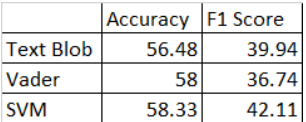


From the above we can say that SVM has the highest F1- score and the Text Blob has the second highest F1 score and then Vader. We can say that SVM is better than Text Blob and then Vader